In [2]:
%matplotlib inline
from astropy.io import fits
import numpy as np
import copy
import matplotlib.pyplot as plt
import constants as pc

In [3]:
# import a code file hydro3.py
import hydro3

# define a dictionary with some arguments that we will pass to the hydrodynamics code
# the "hnames" and "htype" arguments mean we are using a solution for a massive star from Heger & Woosley
# it has "zero" metallicity, meaning it will be a blue supergiant star

# noplot means we aren't going to draw plots as the code runs, which makes it faster
args = {'hname':'z40.0','htype':'zero','noplot':1,'t_stop':2.5e2}

# define the variable h which is a "lagrange_hydro_1d" object (instance of a class)
h = hydro3.lagrange_hydro_1d(**args)

# this tells the hydro code that we are using a Heger & Woosley star (e.g., so that it knows how to read the file)
h.itype=h.HEGER

In [4]:
# variables stored within our object h are accessed by h.variable_name
# use your past labs and class notebooks, the hydro code notes, and class slides for help!
h.bctype=[h.INFLOW, h.OUTFLOW]
h.setup_initial_conditions()
h.initialize_boundary_conditions()

header:  ['grid', 'cell', 'outer', 'total', 'mass', 'cell', 'outer', 'radius', 'cell', 'outer', 'velocity', 'cell', 'density', 'cell', 'temperature', 'cell', 'pressure', 'cell', 'specific', 'energy', 'cell', 'specific', 'entropy', 'cell', 'angular', 'velocity', 'cell', 'A_bar', 'cell', 'Y_e', 'stability', 'NETWORK', 'neutrons', 'H1', 'He3', 'He4', 'C12', 'N14', 'O16', 'Ne20', 'Mg24', 'Si28', 'S32', 'Ar36', 'Ca40', 'Ti44', 'Cr48', 'Fe52', 'Fe54', 'Ni56', 'Fe56', "'Fe'"]
r inner:  289493848.9016604


gzip: heger_progenitors/zero/z40.0 already exists;	not overwritten
gzip: heger_progenitors/zero/z40.0.gz already exists;	not overwritten


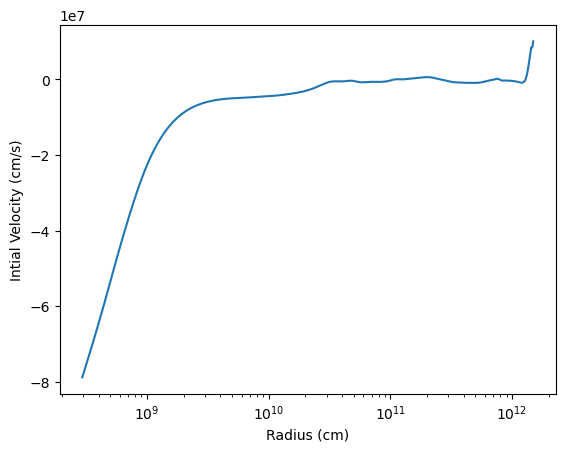

In [5]:
plt.semilogx(h.zones.r, h.zones.v)
plt.xlabel('Radius (cm)')
plt.ylabel('Intial Velocity (cm/s)');

In [5]:
U = 1e52          # create a variable for the initial energy
V = ((4/3) * np.pi * (h.zones.r[5])**3)      # calculate total volume 
u = U/V        # calculate internal energy density

rho = h.zones.d[5]       # calculate density of the first five zones
e = u / rho        # calculate energy per unit mass

h.zones.e[:5] = e   # distribute the initial energy per unit mass to the first 5 zones

In [6]:
h.run()

     0 0.000e+00 6.685e-04
4.289e+33 4.000e+01 5.228e+48 1.241e+52 -1.148e+52 9.344e+50
   100 1.612e-02 1.248e-04
4.289e+33 4.000e+01 3.511e+50 1.236e+52 -1.148e+52 1.233e+51
   200 2.613e-02 7.210e-05
4.289e+33 4.000e+01 6.572e+50 1.268e+52 -1.146e+52 1.879e+51
   300 3.252e-02 6.100e-05
4.289e+33 4.000e+01 8.111e+50 1.285e+52 -1.145e+52 2.212e+51


/home/phdo8065/astr3400/Final Project/hydro3.py:502: RuntimeWarning: divide by zero encountered in divide
  new_d = self.zones.mass/self.zones.vol
/home/phdo8065/astr3400/Final Project/hydro3.py:527: RuntimeWarning: invalid value encountered in multiply
  self.zones.p = (self.gamma - 1)*new_e*new_d


   400 3.903e-02 7.089e-05
4.289e+33 4.000e+01 9.692e+50 1.292e+52 -1.143e+52 2.455e+51
   500 4.688e-02 8.669e-05
4.289e+33 4.000e+01 1.146e+51 1.301e+52 -1.141e+52 2.748e+51
   600 5.589e-02 9.187e-05
4.289e+33 4.000e+01 1.358e+51 1.317e+52 -1.138e+52 3.147e+51
   700 6.458e-02 8.197e-05
4.289e+33 4.000e+01 1.566e+51 1.335e+52 -1.136e+52 3.559e+51
   800 7.254e-02 7.890e-05
4.289e+33 4.000e+01 1.758e+51 1.348e+52 -1.133e+52 3.905e+51
   900 8.060e-02 8.268e-05
4.289e+33 4.000e+01 1.954e+51 1.358e+52 -1.130e+52 4.229e+51
  1000 8.914e-02 8.766e-05
4.289e+33 4.000e+01 2.156e+51 1.368e+52 -1.127e+52 4.568e+51
  1100 9.794e-02 8.766e-05
4.289e+33 4.000e+01 2.353e+51 1.381e+52 -1.124e+52 4.921e+51
  1200 1.067e-01 8.669e-05
4.289e+33 4.000e+01 2.546e+51 1.392e+52 -1.121e+52 5.260e+51
  1300 1.153e-01 8.772e-05
4.289e+33 4.000e+01 2.737e+51 1.402e+52 -1.117e+52 5.582e+51
  1400 1.243e-01 9.136e-05
4.289e+33 4.000e+01 2.932e+51 1.411e+52 -1.114e+52 5.903e+51
  1500 1.336e-01 9.558e-05
4.289

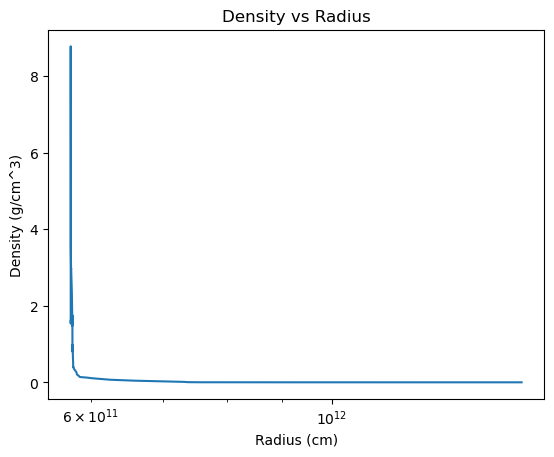

In [7]:
plt.semilogx(h.zones.r, h.zones.d)
plt.title('Density vs Radius')
plt.xlabel('Radius (cm)')
plt.ylabel('Density (g/cm^3)');

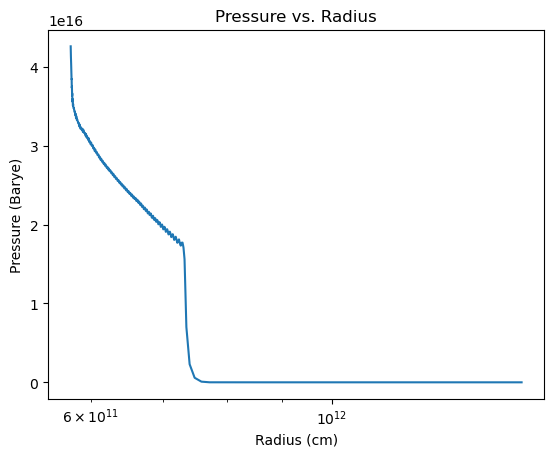

In [8]:
plt.semilogx(h.zones.r, h.zones.p)
plt.title('Pressure vs. Radius')
plt.xlabel('Radius (cm)')
plt.ylabel('Pressure (Barye)');

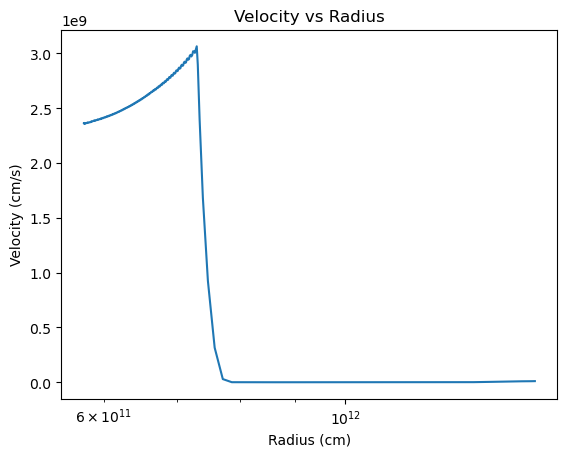

In [9]:
plt.semilogx(h.zones.r, h.zones.v)
plt.title('Velocity vs Radius')
plt.xlabel('Radius (cm)')
plt.ylabel('Velocity (cm/s)');

In [10]:
h.t_stop=h.t*2.
h.run()

1214900 2.500e+02 2.029e-04
4.289e+33 4.000e+01 2.251e+53 6.106e+52 -3.338e+50 2.858e+53
1215000 2.500e+02 2.029e-04
4.289e+33 4.000e+01 2.251e+53 6.105e+52 -3.338e+50 2.858e+53
1215100 2.501e+02 2.028e-04
4.289e+33 4.000e+01 2.251e+53 6.105e+52 -3.338e+50 2.858e+53
1215200 2.501e+02 2.028e-04
4.289e+33 4.000e+01 2.251e+53 6.105e+52 -3.338e+50 2.858e+53
1215300 2.501e+02 2.028e-04
4.289e+33 4.000e+01 2.251e+53 6.105e+52 -3.337e+50 2.858e+53
1215400 2.501e+02 2.028e-04
4.289e+33 4.000e+01 2.251e+53 6.105e+52 -3.337e+50 2.858e+53
1215500 2.501e+02 2.028e-04
4.289e+33 4.000e+01 2.251e+53 6.105e+52 -3.337e+50 2.858e+53
1215600 2.502e+02 2.028e-04
4.289e+33 4.000e+01 2.251e+53 6.105e+52 -3.337e+50 2.858e+53
1215700 2.502e+02 2.028e-04
4.289e+33 4.000e+01 2.251e+53 6.104e+52 -3.336e+50 2.858e+53
1215800 2.502e+02 2.028e-04
4.289e+33 4.000e+01 2.251e+53 6.104e+52 -3.336e+50 2.859e+53
1215900 2.502e+02 2.028e-04
4.289e+33 4.000e+01 2.252e+53 6.104e+52 -3.336e+50 2.859e+53
1216000 2.502e+02 2.0

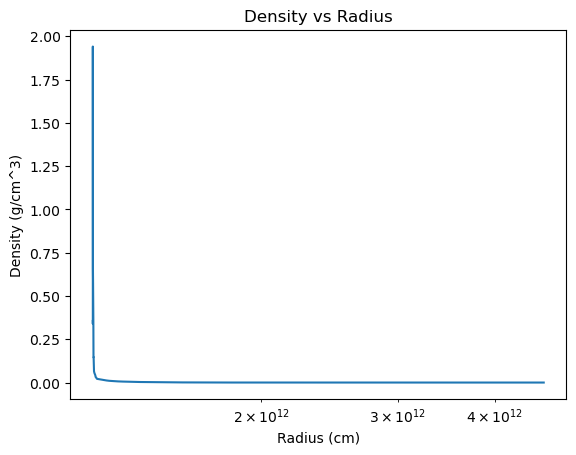

In [11]:
plt.semilogx(h.zones.r, h.zones.d)
plt.title('Density vs Radius')
plt.xlabel('Radius (cm)')
plt.ylabel('Density (g/cm^3)');

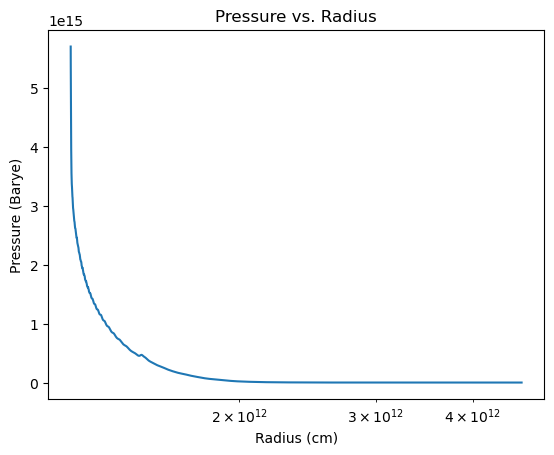

In [12]:
plt.semilogx(h.zones.r, h.zones.p)
plt.title('Pressure vs. Radius')
plt.xlabel('Radius (cm)')
plt.ylabel('Pressure (Barye)');

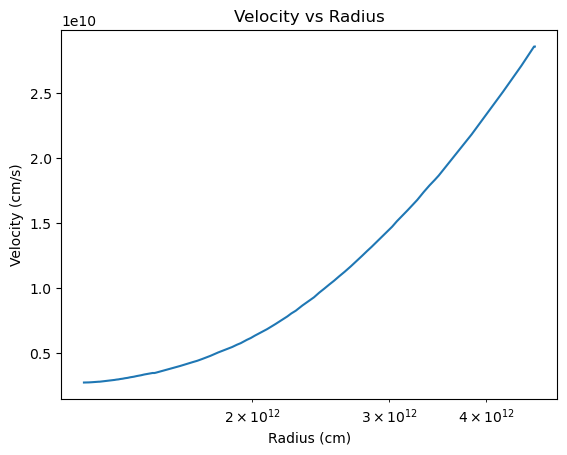

In [13]:
plt.semilogx(h.zones.r, h.zones.v)
plt.title('Velocity vs Radius')
plt.xlabel('Radius (cm)')
plt.ylabel('Velocity (cm/s)');